# Plotting the counted days into the total timespan
This notebooks plots the saved .csv files from the Wflow Rhine Kaub Maxau model.\
It provides a plot for the days that Maxau exceeds the critical value, a plot for the days that Kaub exceeds the critical value and it plots the days no shipping is possible.\
All three graphs are plotted with the timespan used in the hydrological model/forcing file and are provided with a trend line.

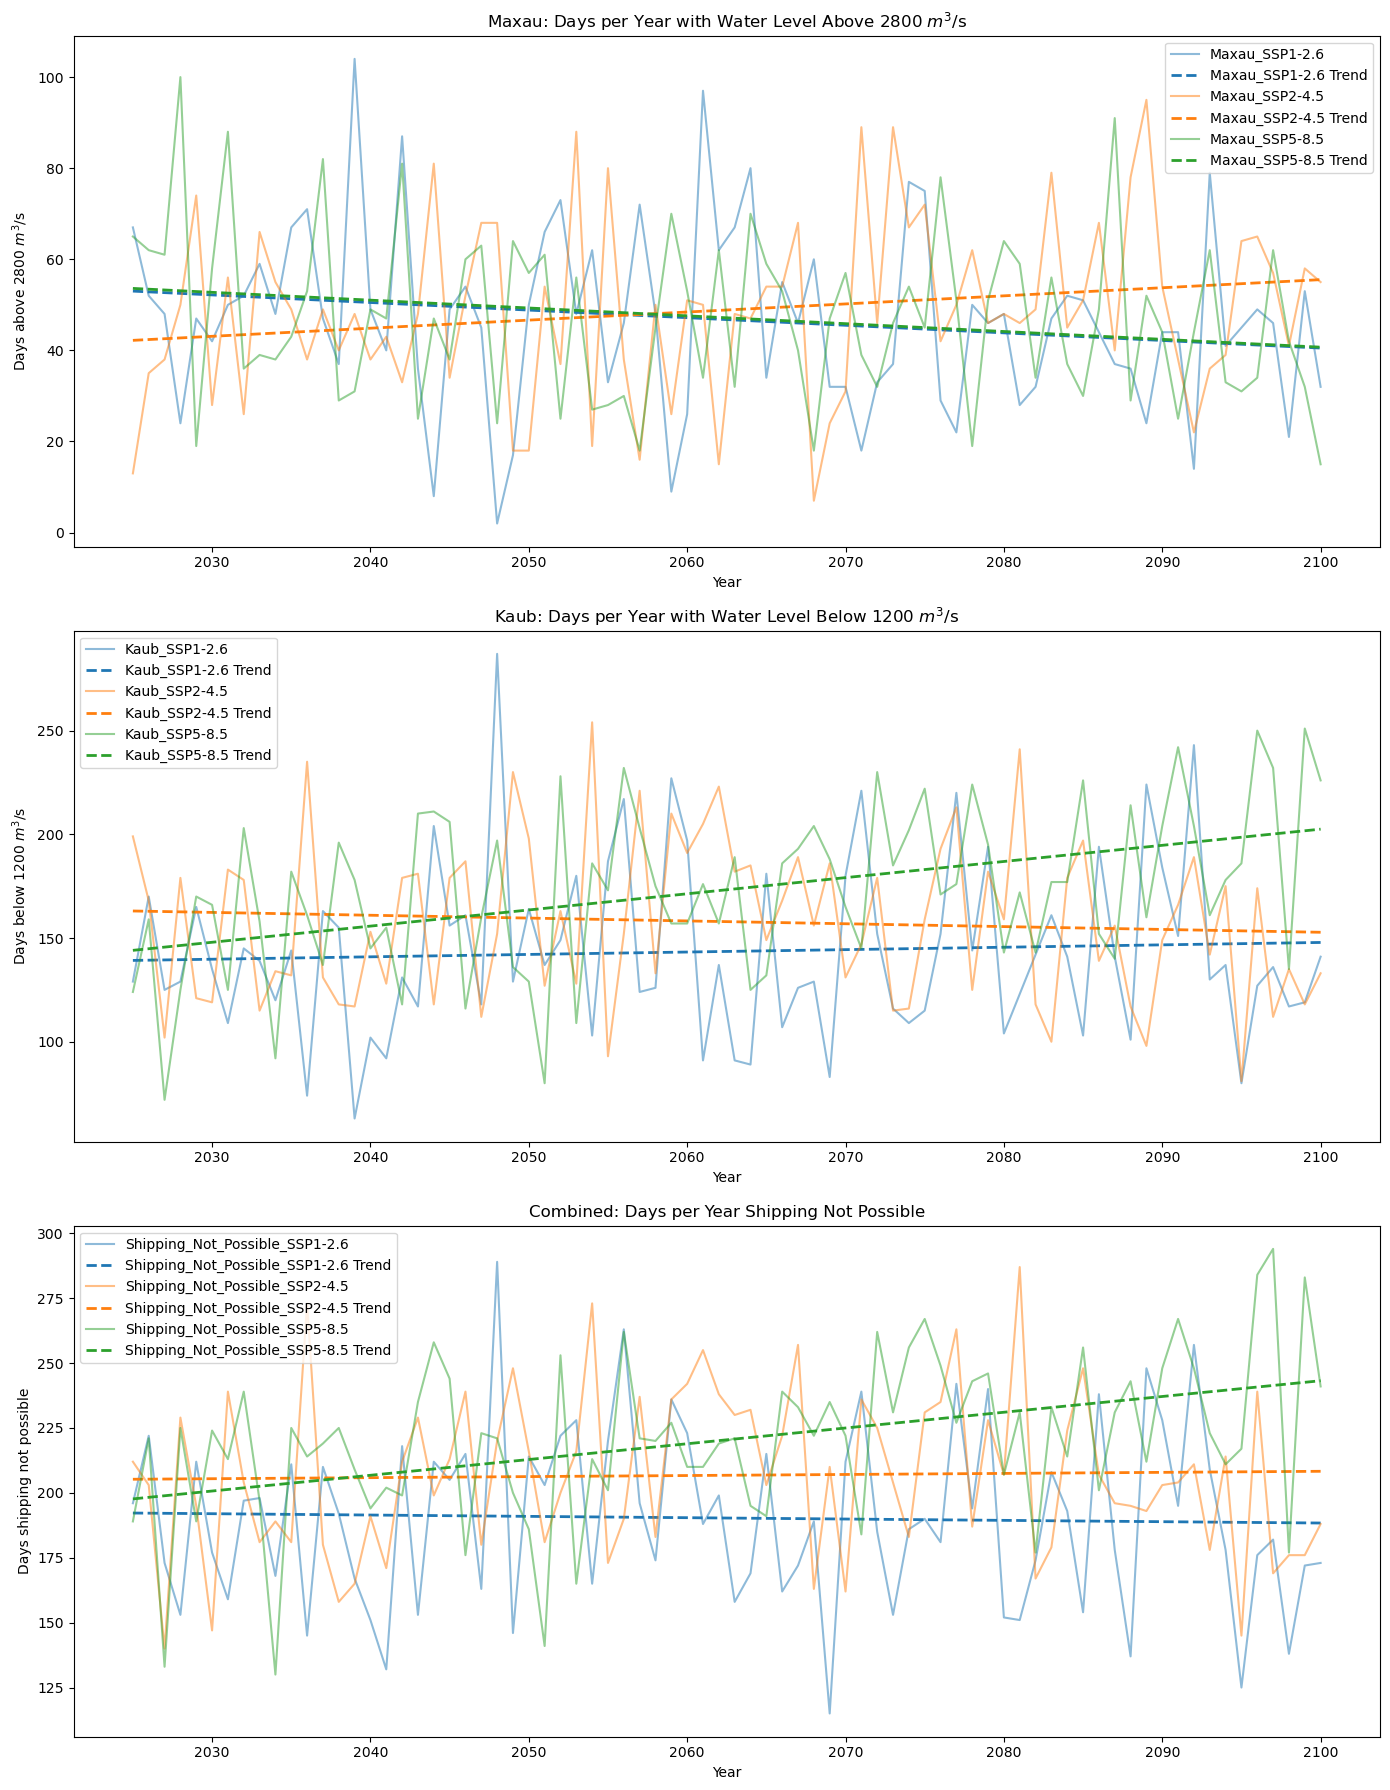

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def add_trend_line(ax, x, y, label, color):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle='dashed', linewidth=2, color=color, alpha=1, label=f'{label} Trend')

# Load the results from different timespans
combined_results_1 = pd.read_csv('combined_results_2025 - 2050.csv', index_col='Year')
combined_results_2 = pd.read_csv('combined_results_2050 - 2075.csv', index_col='Year')
combined_results_3 = pd.read_csv('combined_results_2075 - 2100.csv', index_col='Year')

# Combine the dataframes
combined_results_all = pd.concat([combined_results_1, combined_results_2, combined_results_3])

# Ensure no duplicate rows for overlapping years (optional)
combined_results_all = combined_results_all.loc[~combined_results_all.index.duplicated(keep='first')]


# Plotting the combined results
plt.figure(figsize=(14, 18))

# Maxau Plot
ax1 = plt.subplot(3, 1, 1)
for column in combined_results_all.columns:
    if 'Maxau' in column:
        x = combined_results_all.index
        y = combined_results_all[column].dropna()
        ax1.plot(x, y, label=column, alpha=0.5)
        add_trend_line(ax1, x, y, column, ax1.get_lines()[-1].get_color())

ax1.set_xlabel('Year')
ax1.set_ylabel('Days above 2800 $m^3$/s')
ax1.set_title('Maxau: Days per Year with Water Level Above 2800 $m^3$/s')
ax1.legend()

# Kaub Plot
ax2 = plt.subplot(3, 1, 2)
for column in combined_results_all.columns:
    if 'Kaub' in column:
        x = combined_results_all.index
        y = combined_results_all[column].dropna()
        ax2.plot(x, y, label=column, alpha=0.5)
        add_trend_line(ax2, x, y, column, ax2.get_lines()[-1].get_color())

ax2.set_xlabel('Year')
ax2.set_ylabel('Days below 1200 $m^3$/s')
ax2.set_title('Kaub: Days per Year with Water Level Below 1200 $m^3$/s')
ax2.legend()

# Combined Shipping Not Possible Plot
ax3 = plt.subplot(3, 1, 3)
for column in combined_results_all.columns:
    if 'Shipping_Not_Possible' in column:
        x = combined_results_all.index
        y = combined_results_all[column].dropna()
        ax3.plot(x, y, label=column, alpha=0.5)
        add_trend_line(ax3, x, y, column, ax3.get_lines()[-1].get_color())

ax3.set_xlabel('Year')
ax3.set_ylabel('Days shipping not possible')
ax3.set_title('Combined: Days per Year Shipping Not Possible')
ax3.legend()

plt.tight_layout()
plt.show()